In [1]:
import numpy as np
from scipy.special import comb

def get_bezier_parameters(X, Y, degree=3):
    """ Least square qbezier fit using penrose pseudoinverse.

    Parameters:

    X: array of x data.
    Y: array of y data. Y[0] is the y point for X[0].
    degree: degree of the Bézier curve. 2 for quadratic, 3 for cubic.

    Based on https://stackoverflow.com/questions/12643079/b%C3%A9zier-curve-fitting-with-scipy
    and probably on the 1998 thesis by Tim Andrew Pastva, "Bézier Curve Fitting".
    """
    if degree < 1:
        raise ValueError('degree must be 1 or greater.')

    if len(X) != len(Y):
        raise ValueError('X and Y must be of the same length.')

    if len(X) < degree + 1:
        raise ValueError(f'There must be at least {degree + 1} points to '
                         f'determine the parameters of a degree {degree} curve. '
                         f'Got only {len(X)} points.')

    def bpoly(n, t, k):
        """ Bernstein polynomial when a = 0 and b = 1. """
        return t ** k * (1 - t) ** (n - k) * comb(n, k)
        #return comb(n, i) * ( t**(n-i) ) * (1 - t)**i

    def bmatrix(T):
        """ Bernstein matrix for Bézier curves. """
        return np.matrix([[bpoly(degree, t, k) for k in range(degree + 1)] for t in T])

    def least_square_fit(points, M):
        M_ = np.linalg.pinv(M)
        return M_ * points

    T = np.linspace(0, 1, len(X))
    M = bmatrix(T)
    points = np.array(list(zip(X, Y)))
    
    final = least_square_fit(points, M).tolist()
    final[0] = [X[0], Y[0]]
    final[len(final)-1] = [X[len(X)-1], Y[len(Y)-1]]
    return final

In [2]:
def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """
    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=50):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals

In [3]:
points = []
xpoints = [19.21270, 19.21269, 19.21268, 19.21266, 19.21264, 19.21263, 19.21261, 19.21261, 19.21264, 19.21268,19.21274, 19.21282, 19.21290, 19.21299, 19.21307, 19.21316, 19.21324, 19.21333, 19.21342]
ypoints = [-100.14895, -100.14885, -100.14875, -100.14865, -100.14855, -100.14847, -100.14840, -100.14832, -100.14827, -100.14823, -100.14818, -100.14818, -100.14818, -100.14818, -100.14819, -100.14819, -100.14819, -100.14820, -100.14820]
for i in range(len(xpoints)):
    points.append([xpoints[i],ypoints[i]])

[[19.2127, -100.14895], [19.212788215771155, -100.14861280986217], [19.212216827398706, -100.14812789882305], [19.212819174149256, -100.1480594400454], [19.21311815507284, -100.14823860860862], [19.21342, -100.1482]]


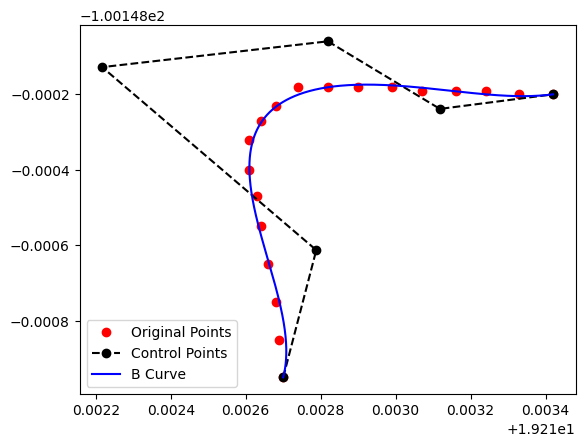

In [4]:
import matplotlib.pyplot as plt
# Plot the original points
plt.plot(xpoints, ypoints, "ro",label='Original Points')
# Get the Bezier parameters based on a degree.
data = get_bezier_parameters(xpoints, ypoints, degree=5)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
print(data)
# Plot the control points
plt.plot(x_val,y_val,'k--o', label='Control Points')
# Plot the resulting Bezier curve
xvals, yvals = bezier_curve(data, nTimes=1000)
plt.plot(xvals, yvals, 'b-', label='B Curve')
plt.legend()
plt.show()